In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

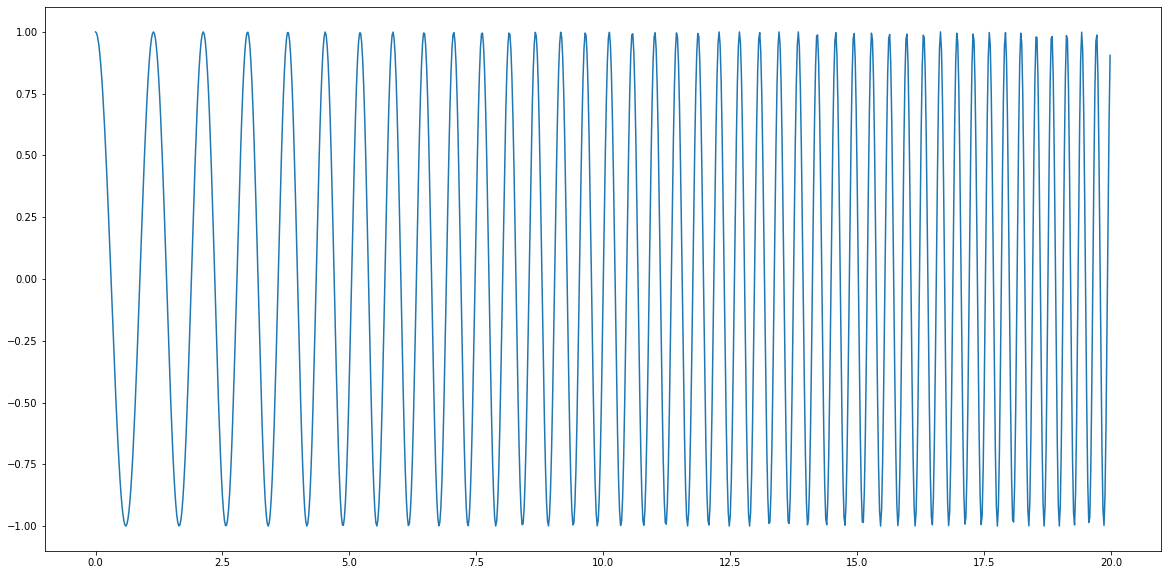

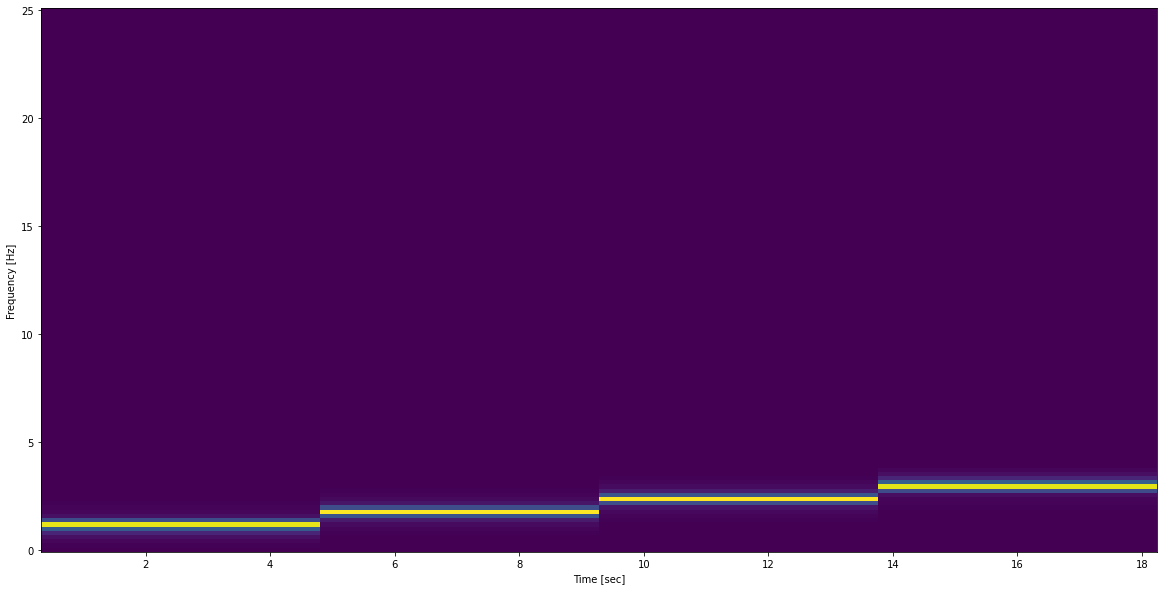

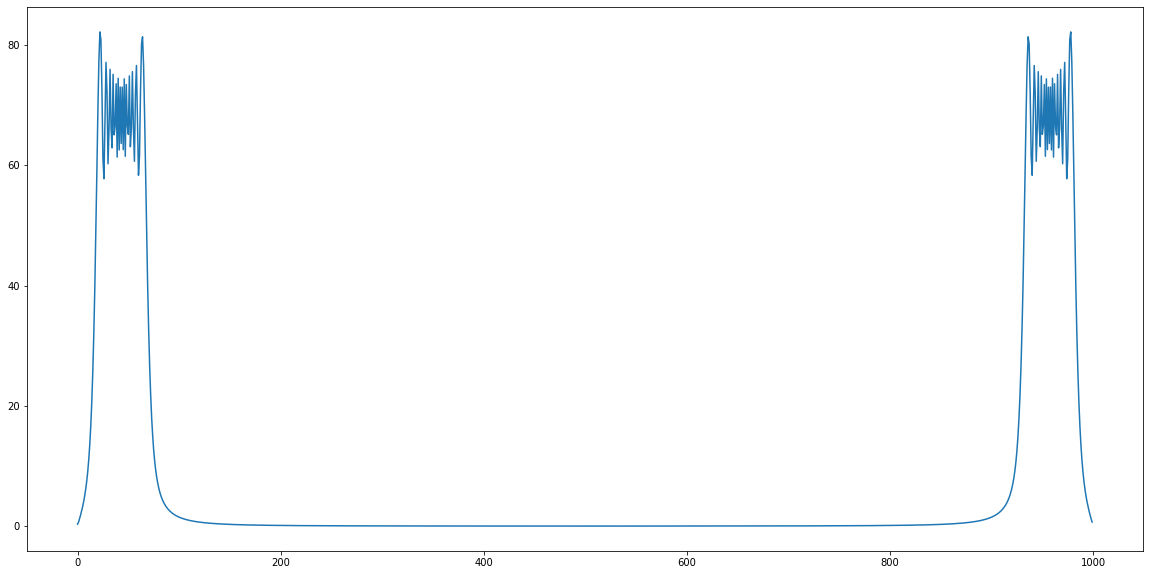

In [14]:
def generateSweep(startFreq, endFreq, sampleRate, duration):
    # Generate a linear chirp signal
    # startFreq: Start frequency in Hz
    # endFreq: End frequency in Hz
    # sampleRate: Sampling rate in samples per second
    # returns: time and signal vectors
    # The frequency of the signal is defined by:
    # f(t) = startFreq + (endFreq - startFreq) * t / T
    # where T is the total time of the signal
    # The phase of the signal is defined by:
    # phi(t) = 2 * pi * (startFreq * t + (endFreq - startFreq) * t^2 / (2 * T))
    # The signal is then:
    # s(t) = cos(phi(t))
    # The signal is generated in the frequency domain by taking the inverse
    # Fourier transform of the frequency response:
    # H(f) = exp(j * phi(t))
    # The frequency response is then:
    # H(f) = exp(j * 2 * pi * (startFreq * t + (endFreq - startFreq) * t^2 / (2 * T)))
    # The inverse Fourier transform is:
    # h(t) = 1 / T * integral(H(f) * exp(j * 2 * pi * f * t), f, -inf, inf)
    # h(t) = 1 / T * integral(exp(j * 2 * pi * (startFreq * t + (endFreq - startFreq) * t^2 / (2 * T))) * exp(j * 2 * pi * f * t), f, -inf, inf)
    # h(t) = 1 / T * integral(exp(j * 2 * pi * (startFreq * t + (endFreq - startFreq) * t^2 / (2 * T)) + j * 2 * pi * f * t), f, -inf, inf)
    # h(t) = 1 / T * integral(exp(j * 2 * pi * (startFreq * t + (endFreq - startFreq) * t^2 / (2 * T) + f * t)), f, -inf, inf)
    # h(t) = 1 / T * integral(exp(j * 2 * pi * ((startFreq + t) * t + (endFreq - startFreq) * t^2 / (2 * T))), f, -inf, inf)

    outRange = np.arange(0, duration, 1 / sampleRate)
    outData = np.zeros(len(outRange))
    for i in range(len(outRange)):
        t = outRange[i]
        outData[i] = np.cos(2 * np.pi * (startFreq * t + (endFreq - startFreq) * t * t / (2 * duration)))
    return outRange, outData

sweep = generateSweep(0.8, 3.5, 50, 20)

# Set plot size
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(sweep[0], sweep[1])
plt.show()

# Generate a spectrogram
f, t, Sxx = sig.spectrogram(sweep[1], 50)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Generate FFT
fft = np.fft.fft(sweep[1])
plt.plot(np.abs(fft))
plt.show()


